<a href="https://colab.research.google.com/github/Guliko24/CF969_SU/blob/main/Assignment_1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gurobipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 16.9 MB/s eta 0:00:00


# **Assignment 1**
# **Student ID:2323017**


## **TASK 1**
Solve the above problem for the following 29 different values of the right hand side r:
r = 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, …, 8.50, 8.75, 9.00.
Save the obtained 29 values of 𝜎(𝒙)= √𝒙𝑻𝑪𝒙 and 𝜇(𝒙)= 𝝁𝛵𝒙 in two vectors. Plot these vectors in a figure showing 𝜎 on the horizontal and 𝜇 on the vertical axis. Use the following code for generating your vector μ and matrix C. Note that the generated data uses input of random numbers, so that the values of the matrix C will vary with each run. Note also that you are expected to replace variables dig1 and dig2 below with the appropriate registration number digits

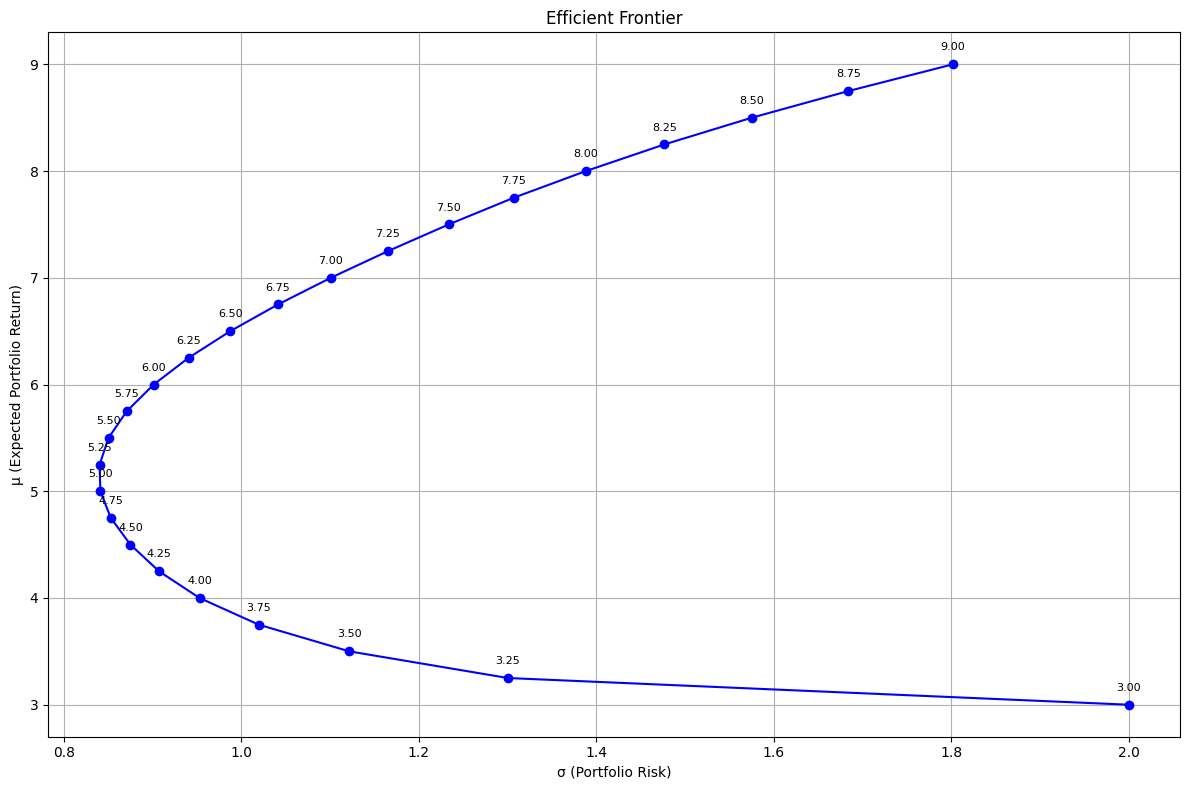

σ values:
[1.999999999999644, 1.3004781905498195, 1.1216945513430456, 1.0196826915606931, 0.9529623472369109, 0.9073329058879208, 0.8750662957600214, 0.8529123668874777, 0.8411902317251337, 0.8403365534453408, 0.850384064355169, 0.8709555714893138, 0.9013307799324033, 0.9405603430642175, 0.9875896717679873, 1.0413625580780026, 1.1008912805981133, 1.1652940670807261, 1.23380789857822, 1.3070005258743767, 1.3883752673996275, 1.476976855250545, 1.5753333859912062, 1.6843140667076892, 1.8020052151215977]

μ values:
[2.9999999999998956, 3.249999999999621, 3.4999999999999667, 3.7500000000133804, 4.000000000001066, 4.250000000000262, 4.499999999999952, 4.749999999999925, 4.99999999999995, 5.2500000000000036, 5.500000000000014, 5.749999999999994, 5.9999999999999645, 6.250000000000002, 6.499999999999997, 6.749999999999998, 7.000000000000002, 7.25000000000045, 7.499999999997995, 7.750000000001219, 7.9999999999994404, 8.250000000023755, 8.500000000000197, 8.750000000001656, 8.999999999986045]


In [5]:
import numpy as np
import random
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

# Data generation as per the given code
n = 10
dig1 = 1 ## student ID digit
dig2 = 7  ##student ID digit

dummyrepetitions = 10*dig1+dig2
for _ in range(dummyrepetitions):
    dummy = random.uniform(0,1)

Corr = np.array([[0]*n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1)**abs(i-j)/(abs(i-j)+1)

ssigma = np.array([[0]*1 for _ in range(n)], dtype=float)
mmu = np.array([[0]*1 for _ in range(n)], dtype=float)
ssigma[0] = 2
mmu[0] = 3

for i in range(n-1):
    ssigma[i+1] = ssigma[i] + 2*random.uniform(0,1)
    mmu[i+1] = mmu[i] + 1

ddiag = np.diag(ssigma.flatten())
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5*(C2 + C2.T)

# Optimization function
def optimize_portfolio(returns, cov_matrix, target_return):
    n = len(returns)
    model = gp.Model("Portfolio Optimization")
    model.setParam('OutputFlag', 0)  # Suppress Gurobi output

    x = model.addVars(n, lb=0, name="x")

    obj = gp.QuadExpr()
    for i in range(n):
        for j in range(n):
            obj += x[i] * x[j] * cov_matrix[i, j]
    model.setObjective(obj, GRB.MINIMIZE)

    model.addConstr(gp.quicksum(returns[i] * x[i] for i in range(n)) == target_return, "return")
    model.addConstr(gp.quicksum(x[i] for i in range(n)) == 1, "investment")

    model.optimize()

    if model.status == GRB.OPTIMAL:
        return [x[i].x for i in range(n)], model.objVal
    else:
        return None, None

# Generate efficient frontier for the given r values
r_values = np.arange(2.00, 9.25, 0.25)
sigma_values = []
mu_values = []
valid_r_values = []  # Store r values for which we have results

for r in r_values:
    weights, risk = optimize_portfolio(mmu.flatten(), C, r)
    if weights is not None:
        sigma = np.sqrt(risk)
        mu = np.dot(mmu.flatten(), weights)
        sigma_values.append(sigma)
        mu_values.append(mu)
        valid_r_values.append(r)  # Store the r value


# Plot the efficient frontier with labels
plt.figure(figsize=(12, 8))
plt.plot(sigma_values, mu_values, 'b-o')

# Add labels to each point
for i, r in enumerate(valid_r_values):  # Iterate over valid r values
    plt.annotate(f'{r:.2f}', (sigma_values[i], mu_values[i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontsize=8)

plt.xlabel('σ (Portfolio Risk)')
plt.ylabel('μ (Expected Portfolio Return)')
plt.title('Efficient Frontier')
plt.grid(True)

# Adjust the plot layout to prevent overlapping labels
plt.tight_layout()

plt.show()

# Print the results
print("σ values:")
print(sigma_values)
print("\nμ values:")
print(mu_values)
r_values = np.arange(2.00, 9.25, 0.25)
sigma_values = []
mu_values = []

for r in r_values:
    weights, risk = optimize_portfolio(mmu.flatten(), C, r)
    if weights is not None:
        sigma = np.sqrt(risk)
        mu = np.dot(mmu.flatten(), weights)
        sigma_values.append(sigma)
        mu_values.append(mu)



In [ ]:
# Print the results
print("σ values:")
print(sigma_values)
print("\nμ values:")
print(mu_values)

σ values:
[1.9999999999996432, 1.3104486945509999, 1.022063423394682, 0.9255649509538327, 0.8758282585748574, 0.8460796662223544, 0.8285826430950536, 0.823543999397893, 0.8311903326636969, 0.8511798558155415, 0.8826743750908133, 0.9244988294210843, 0.9753252003425144, 1.0338266464492858, 1.0987779352795537, 1.1691045696895699, 1.243895158903708, 1.322392515663478, 1.4040099471527132, 1.4909296868607123, 1.583890160268924, 1.6818896900453084, 1.784885082718667, 1.898811502790026, 2.023343769431494]

μ values:
[3.0, 3.250000000000173, 3.5000000000008082, 3.7500000000151537, 3.9999999999984412, 4.2500000000003535, 4.499999999999918, 4.749999999999945, 4.999999999999982, 5.2500000000000115, 5.50000000000001, 5.749999999999991, 6.000000000000001, 6.250000000000004, 6.499999999999998, 6.750000000000004, 7.000000000000011, 7.24999999999987, 7.499999999996389, 7.749999999999445, 8.000000000000062, 8.25000000000028, 8.50000000000064, 8.749999999999927, 8.99999999999346]


## **TASK 2**
Repeat Task 1 but modified as follows. Assume that it is not necessary to invest the whole capital, and that the not invested fraction 1− Σ𝑥𝑗𝑗 of the whole capital can be saved without any return and without any “risk”. Justify why this situation can be modelled by simply changing the constraint
𝒆𝑇𝒙=1, where e = (1, …, 1)T
in the initial problem to .
𝒆𝑇𝒙 ≤ 1, where e = (1, …, 1)T
Then comment on the difference between your obtained new figure and your figure from Task 1.

Restricted license - for non-production use only - expires 2025-11-24


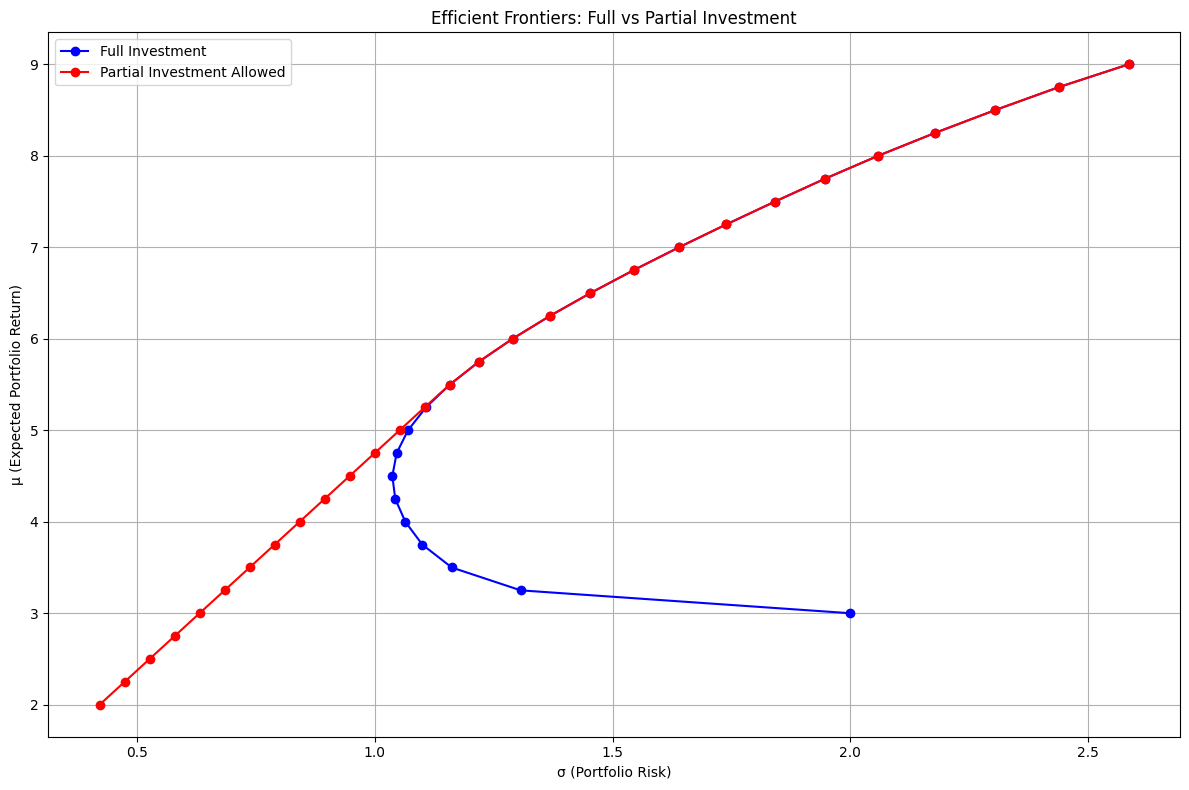

Full Investment σ values: [1.9999999999991604, 1.3067113093358214, 1.1616561601183408, 1.0997815688782315, 1.0639314721774098, 1.0428214363379582, 1.0366663960028102, 1.0457304542932038, 1.0696267794842642, 1.1073955976356264, 1.157679951391905, 1.2189319209725715, 1.2895896572150778, 1.3681967102523807, 1.453463893536365, 1.5442883926266655, 1.639747019301491, 1.7390768335337905, 1.8416515621796699, 1.9469682302447924, 2.0584788670117615, 2.1782349365283737, 2.30495172573797, 2.4383982545281953, 2.585551380444447]
Full Investment μ values: [3.0000000000000013, 3.2499999999997153, 3.4999999999932503, 3.7499999999994467, 3.999999999999908, 4.250000000000007, 4.499999999999971, 4.750000000000009, 5.00000000000002, 5.250000000000008, 5.500000000000001, 5.75, 6.000000000000003, 6.250000000000005, 6.500000000000001, 6.7499999999999964, 6.9999999999999964, 7.250000000000012, 7.500000000000032, 7.750000000004834, 8.000000000000114, 8.250000000000032, 8.500000000000146, 8.749999999991838, 8.99

In [3]:
import numpy as np
import random
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

# Data generation as per the given code
n = 10
dig1 = 1 ## student ID digit
dig2 = 7  ##student ID digit

dummyrepetitions = 10*dig1+dig2
for _ in range(dummyrepetitions):
    dummy = random.uniform(0,1)

Corr = np.array([[0]*n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1)**abs(i-j)/(abs(i-j)+1)

ssigma = np.array([[0]*1 for _ in range(n)], dtype=float)
mmu = np.array([[0]*1 for _ in range(n)], dtype=float)
ssigma[0] = 2
mmu[0] = 3

for i in range(n-1):
    ssigma[i+1] = ssigma[i] + 2*random.uniform(0,1)
    mmu[i+1] = mmu[i] + 1

ddiag = np.diag(ssigma.flatten())
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5*(C2 + C2.T)

def optimize_portfolio(returns, cov_matrix, target_return, allow_partial_investment=False):
    n = len(returns)
    model = gp.Model("Portfolio Optimization")
    model.setParam('OutputFlag', 0)

    x = model.addVars(n, lb=0, name="x")

    obj = gp.QuadExpr()
    for i in range(n):
        for j in range(n):
            obj += x[i] * x[j] * cov_matrix[i, j]
    model.setObjective(obj, GRB.MINIMIZE)

    model.addConstr(gp.quicksum(returns[i] * x[i] for i in range(n)) == target_return, "return")

    if allow_partial_investment:
        model.addConstr(gp.quicksum(x[i] for i in range(n)) <= 1, "investment")
    else:
        model.addConstr(gp.quicksum(x[i] for i in range(n)) == 1, "investment")

    model.optimize()

    if model.status == GRB.OPTIMAL:
        return [x[i].x for i in range(n)], model.objVal
    else:
        return None, None

# Generate efficient frontiers for both cases
r_values = np.arange(2.00, 9.25, 0.25)
sigma_values_full = []
mu_values_full = []
sigma_values_partial = []
mu_values_partial = []

for r in r_values:
    # Full investment
    weights_full, risk_full = optimize_portfolio(mmu.flatten(), C, r, False)
    if weights_full is not None:
        sigma_full = np.sqrt(risk_full)
        mu_full = np.dot(mmu.flatten(), weights_full)
        sigma_values_full.append(sigma_full)
        mu_values_full.append(mu_full)

    # Partial investment allowed
    weights_partial, risk_partial = optimize_portfolio(mmu.flatten(), C, r, True)
    if weights_partial is not None:
        sigma_partial = np.sqrt(risk_partial)
        mu_partial = np.dot(mmu.flatten(), weights_partial)
        sigma_values_partial.append(sigma_partial)
        mu_values_partial.append(mu_partial)

# Plot both efficient frontiers
plt.figure(figsize=(12, 8))
plt.plot(sigma_values_full, mu_values_full, 'b-o', label='Full Investment')
plt.plot(sigma_values_partial, mu_values_partial, 'r-o', label='Partial Investment Allowed')

plt.xlabel('σ (Portfolio Risk)')
plt.ylabel('μ (Expected Portfolio Return)')
plt.title('Efficient Frontiers: Full vs Partial Investment')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Full Investment σ values:", sigma_values_full)
print("Full Investment μ values:", mu_values_full)
print("\nPartial Investment σ values:", sigma_values_partial)
print("Partial Investment μ values:", mu_values_partial)

Task 3

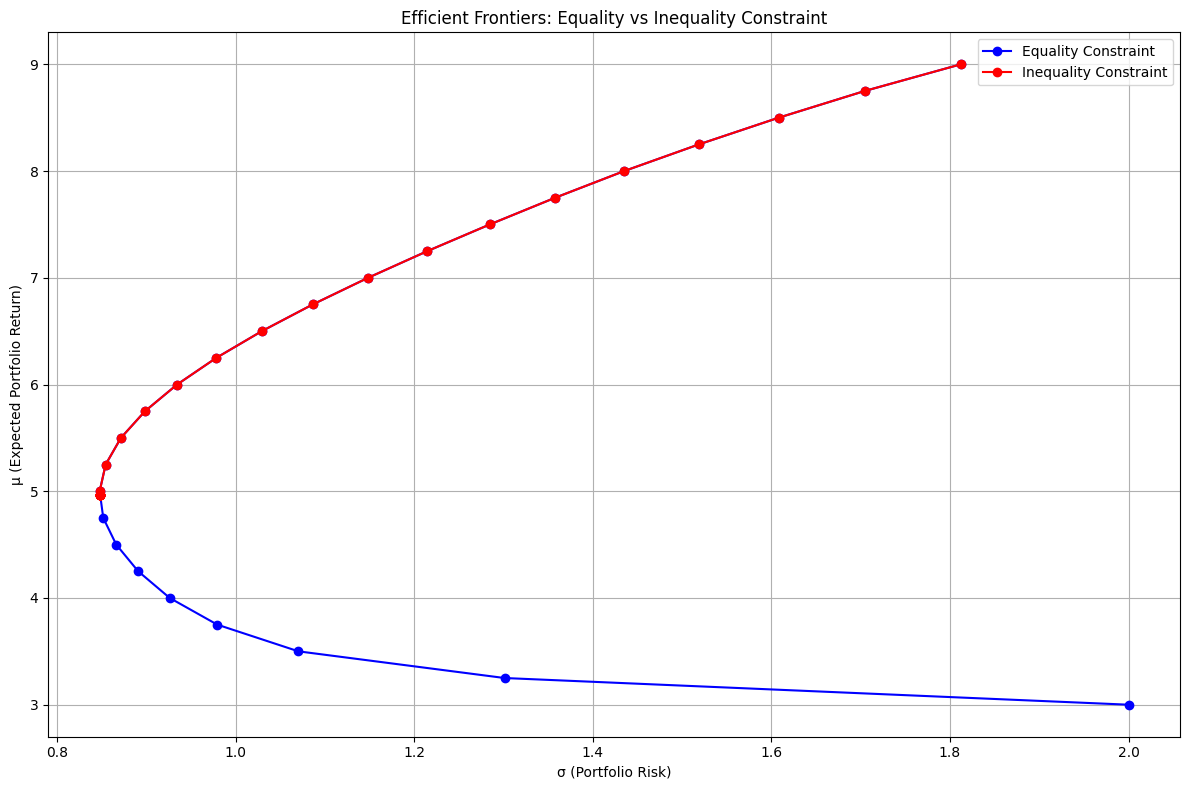

Equality Constraint σ values: [1.999999999999741, 1.3012603539590835, 1.0704439581049487, 0.9795883903508845, 0.9263120654113746, 0.8909912995209621, 0.8664166853117367, 0.8518634374291113, 0.8478477610905787, 0.8545182282796618, 0.8716295345246055, 0.8985854188481682, 0.9345343926228532, 0.9784857554102998, 1.0294150196127099, 1.0863412254835405, 1.1483728925237653, 1.214728121391444, 1.2847371653503477, 1.3578349773348988, 1.435110687280861, 1.5188501162036518, 1.6081186932745828, 1.7043770424537168, 1.8120177726747058]
Equality Constraint μ values: [3.000000000000037, 3.250000000001041, 3.4999999999998788, 3.749999999983314, 4.000000000001841, 4.249999999997641, 4.499999999999924, 4.749999999999952, 5.000000000000042, 5.249999999999998, 5.49999999999998, 5.7500000000000036, 5.999999999999999, 6.249999999999998, 6.499999999999998, 6.750000000000003, 7.000000000000001, 7.249999999999998, 7.5, 7.74999999998545, 7.999999999997979, 8.249999999999865, 8.499999999994829, 8.7499999999996, 9

In [4]:
import numpy as np
import random
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

# Data generation as per the given code
n = 10
dig1 = 1 ## student ID digit
dig2 = 7  ##student ID digit

dummyrepetitions = 10*dig1+dig2
for _ in range(dummyrepetitions):
    dummy = random.uniform(0,1)

Corr = np.array([[0]*n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1)**abs(i-j)/(abs(i-j)+1)

ssigma = np.array([[0]*1 for _ in range(n)], dtype=float)
mmu = np.array([[0]*1 for _ in range(n)], dtype=float)
ssigma[0] = 2
mmu[0] = 3

for i in range(n-1):
    ssigma[i+1] = ssigma[i] + 2*random.uniform(0,1)
    mmu[i+1] = mmu[i] + 1

ddiag = np.diag(ssigma.flatten())
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5*(C2 + C2.T)

def optimize_portfolio(returns, cov_matrix, target_return, inequality_constraint=False):
    n = len(returns)
    model = gp.Model("Portfolio Optimization")
    model.setParam('OutputFlag', 0)

    x = model.addVars(n, lb=0, name="x")

    obj = gp.QuadExpr()
    for i in range(n):
        for j in range(n):
            obj += x[i] * x[j] * cov_matrix[i, j]
    model.setObjective(obj, GRB.MINIMIZE)

    if inequality_constraint:
        model.addConstr(gp.quicksum(returns[i] * x[i] for i in range(n)) >= target_return, "return")
    else:
        model.addConstr(gp.quicksum(returns[i] * x[i] for i in range(n)) == target_return, "return")

    model.addConstr(gp.quicksum(x[i] for i in range(n)) == 1, "investment")

    model.optimize()

    if model.status == GRB.OPTIMAL:
        return [x[i].x for i in range(n)], model.objVal
    else:
        return None, None

# Generate efficient frontiers for both cases
r_values = np.arange(2.00, 9.25, 0.25)
sigma_values_equality = []
mu_values_equality = []
sigma_values_inequality = []
mu_values_inequality = []

for r in r_values:
    # Equality constraint (original)
    weights_eq, risk_eq = optimize_portfolio(mmu.flatten(), C, r, False)
    if weights_eq is not None:
        sigma_eq = np.sqrt(risk_eq)
        mu_eq = np.dot(mmu.flatten(), weights_eq)
        sigma_values_equality.append(sigma_eq)
        mu_values_equality.append(mu_eq)

    # Inequality constraint
    weights_ineq, risk_ineq = optimize_portfolio(mmu.flatten(), C, r, True)
    if weights_ineq is not None:
        sigma_ineq = np.sqrt(risk_ineq)
        mu_ineq = np.dot(mmu.flatten(), weights_ineq)
        sigma_values_inequality.append(sigma_ineq)
        mu_values_inequality.append(mu_ineq)

# Plot both efficient frontiers
plt.figure(figsize=(12, 8))
plt.plot(sigma_values_equality, mu_values_equality, 'b-o', label='Equality Constraint')
plt.plot(sigma_values_inequality, mu_values_inequality, 'r-o', label='Inequality Constraint')

plt.xlabel('σ (Portfolio Risk)')
plt.ylabel('μ (Expected Portfolio Return)')
plt.title('Efficient Frontiers: Equality vs Inequality Constraint')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Equality Constraint σ values:", sigma_values_equality)
print("Equality Constraint μ values:", mu_values_equality)
print("\nInequality Constraint σ values:", sigma_values_inequality)
print("Inequality Constraint μ values:", mu_values_inequality)

TASK 4

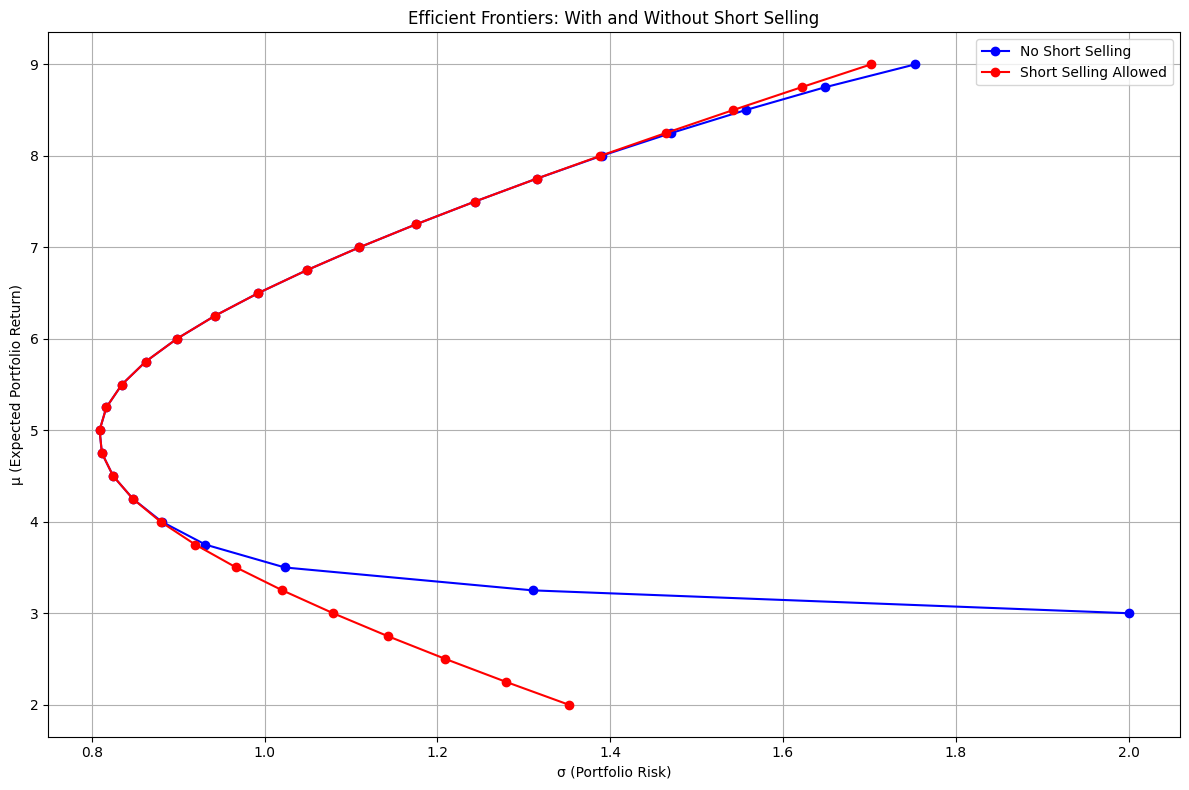

No Short Selling σ values: [1.9999999999997442, 1.310229540557652, 1.0236187198349906, 0.9316324878203255, 0.8811078347502174, 0.8477292585787626, 0.824825280900151, 0.8118023261403088, 0.809137636000863, 0.8169325772744142, 0.8348942341302756, 0.862387588679436, 0.8985381174915447, 0.942350024467938, 0.9928095553512472, 1.0489578076983463, 1.1099317889034706, 1.1749804654793763, 1.24346452987223, 1.3148472931851973, 1.390017890710587, 1.4709191104402244, 1.5567240616330873, 1.64890626502729, 1.7531296985279956]
No Short Selling μ values: [3.0000000000000004, 3.2499999999989626, 3.500000000004998, 3.749999999993275, 4.0000000000131815, 4.249999999999676, 4.500000000000005, 4.75, 4.999999999999992, 5.2500000000000115, 5.5000000000000195, 5.750000000000002, 6.000000000000001, 6.249999999999998, 6.500000000000002, 6.75, 7.0000000000000036, 7.250000000000002, 7.499999999999943, 7.750000000003684, 8.000000000001231, 8.250000000000009, 8.4999999999948, 8.749999999999705, 8.999999999999813]



In [5]:
import numpy as np
import random
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

# Data generation as per the given code
n = 10
dig1 = 1 ## student ID digit
dig2 = 7  ##student ID digit

dummyrepetitions = 10*dig1+dig2
for _ in range(dummyrepetitions):
    dummy = random.uniform(0,1)

Corr = np.array([[0]*n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1)**abs(i-j)/(abs(i-j)+1)

ssigma = np.array([[0]*1 for _ in range(n)], dtype=float)
mmu = np.array([[0]*1 for _ in range(n)], dtype=float)
ssigma[0] = 2
mmu[0] = 3

for i in range(n-1):
    ssigma[i+1] = ssigma[i] + 2*random.uniform(0,1)
    mmu[i+1] = mmu[i] + 1

ddiag = np.diag(ssigma.flatten())
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5*(C2 + C2.T)
def optimize_portfolio(returns, cov_matrix, target_return, allow_short_selling=False):
    n = len(returns)
    model = gp.Model("Portfolio Optimization")
    model.setParam('OutputFlag', 0)

    if allow_short_selling:
        x = model.addVars(n, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="x")
    else:
        x = model.addVars(n, lb=0, name="x")

    obj = gp.QuadExpr()
    for i in range(n):
        for j in range(n):
            obj += x[i] * x[j] * cov_matrix[i, j]
    model.setObjective(obj, GRB.MINIMIZE)

    model.addConstr(gp.quicksum(returns[i] * x[i] for i in range(n)) == target_return, "return")
    model.addConstr(gp.quicksum(x[i] for i in range(n)) == 1, "investment")

    model.optimize()

    if model.status == GRB.OPTIMAL:
        return [x[i].x for i in range(n)], model.objVal
    else:
        return None, None

# Generate efficient frontiers for both cases
r_values = np.arange(2.00, 9.25, 0.25)
sigma_values_no_short = []
mu_values_no_short = []
sigma_values_short = []
mu_values_short = []

for r in r_values:
    # No short selling (original)
    weights_no_short, risk_no_short = optimize_portfolio(mmu.flatten(), C, r, False)
    if weights_no_short is not None:
        sigma_no_short = np.sqrt(risk_no_short)
        mu_no_short = np.dot(mmu.flatten(), weights_no_short)
        sigma_values_no_short.append(sigma_no_short)
        mu_values_no_short.append(mu_no_short)

    # Short selling allowed
    weights_short, risk_short = optimize_portfolio(mmu.flatten(), C, r, True)
    if weights_short is not None:
        sigma_short = np.sqrt(risk_short)
        mu_short = np.dot(mmu.flatten(), weights_short)
        sigma_values_short.append(sigma_short)
        mu_values_short.append(mu_short)

# Plot both efficient frontiers
plt.figure(figsize=(12, 8))
plt.plot(sigma_values_no_short, mu_values_no_short, 'b-o', label='No Short Selling')
plt.plot(sigma_values_short, mu_values_short, 'r-o', label='Short Selling Allowed')

plt.xlabel('σ (Portfolio Risk)')
plt.ylabel('μ (Expected Portfolio Return)')
plt.title('Efficient Frontiers: With and Without Short Selling')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("No Short Selling σ values:", sigma_values_no_short)
print("No Short Selling μ values:", mu_values_no_short)
print("\nShort Selling Allowed σ values:", sigma_values_short)
print("Short Selling Allowed μ values:", mu_values_short)